In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Common imports
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
from tensorflow import set_random_seed

from keras import backend as K
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

Using TensorFlow backend.


In [3]:
# 查看可用的 GPU 
print(K.tensorflow_backend._get_available_gpus())

['/job:localhost/replica:0/task:0/device:GPU:0']


In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

### 整理 Raw data 

In [5]:
# 資料路徑
DATASET_PATH  = '/home/cslab/Documents/NASA/'

# data_dir = '2nd_test/'
# data_dir = '1st_test/'
data_dir = '4th_test/txt/'

In [6]:
merged_data = pd.DataFrame()
for filename in os.listdir(DATASET_PATH + data_dir):
#     print(filename)
    dataset = pd.read_csv(os.path.join(DATASET_PATH+data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)
    
merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']
# merged_data.columns = ['Bearing 1 x', 'Bearing 1 y','Bearing 2 x', 'Bearing 2 y', 'Bearing 3 x', 'Bearing 3 y', 'Bearing 4 x', 'Bearing 4 y']

In [7]:
merged_data

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004.03.22.19.41.57,0.059267,0.063841,0.052802,0.042603
2004.03.21.08.11.57,0.054355,0.064507,0.053446,0.048691
2004.04.03.01.31.57,0.056683,0.062947,0.054715,0.043082
2004.04.03.19.31.57,0.058102,0.061453,0.055113,0.045150
2004.03.28.15.21.57,0.058884,0.061235,0.053958,0.045290
...,...,...,...,...
2004.03.27.08.31.57,0.055770,0.063308,0.053622,0.044947
2004.03.06.02.32.46,0.058152,0.067700,0.052711,0.040910
2004.04.14.17.41.57,0.059882,0.061654,0.055711,0.044240
2004.03.16.00.45.20,0.055808,0.096829,0.051521,0.039041


In [8]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')

In [9]:
merged_data = merged_data.sort_index()

In [10]:
# merged_data.to_csv('merged_dataset_BearingTest_2.csv')
merged_data.to_csv('merged_dataset_BearingTest_4.csv')
# merged_data.to_csv('merged_dataset_BearingTest_1.csv')

In [11]:
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-03-04 09:27:46,0.061630,0.075278,0.051991,0.043475
2004-03-04 09:32:46,0.060774,0.072206,0.052239,0.042039
2004-03-04 09:42:46,0.062195,0.072886,0.054809,0.041360
2004-03-04 09:52:46,0.062994,0.073433,0.054261,0.043126
2004-03-04 10:02:46,0.061945,0.073006,0.053237,0.042617


In [12]:
merged_data.tail()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-04-18 02:02:55,0.122483,0.188266,0.342773,0.195169
2004-04-18 02:12:55,0.110250,0.166027,0.331777,0.205829
2004-04-18 02:22:55,0.115789,0.201599,0.404317,0.222174
2004-04-18 02:32:55,0.119909,0.199330,0.543770,0.229026
2004-04-18 02:42:55,0.001533,0.002441,0.003663,0.001428


In [13]:
merged_data.shape

(6324, 4)

### Loading Data

In [14]:
# bearing_data = pd.read_csv('./merged_dataset_BearingTest_2.csv', header=0, index_col=0)
# bearing_data = pd.read_csv('./merged_dataset_BearingTest_1.csv', header=0, index_col=0)
bearing_data = pd.read_csv('./merged_dataset_BearingTest_4.csv', header=0, index_col=0)

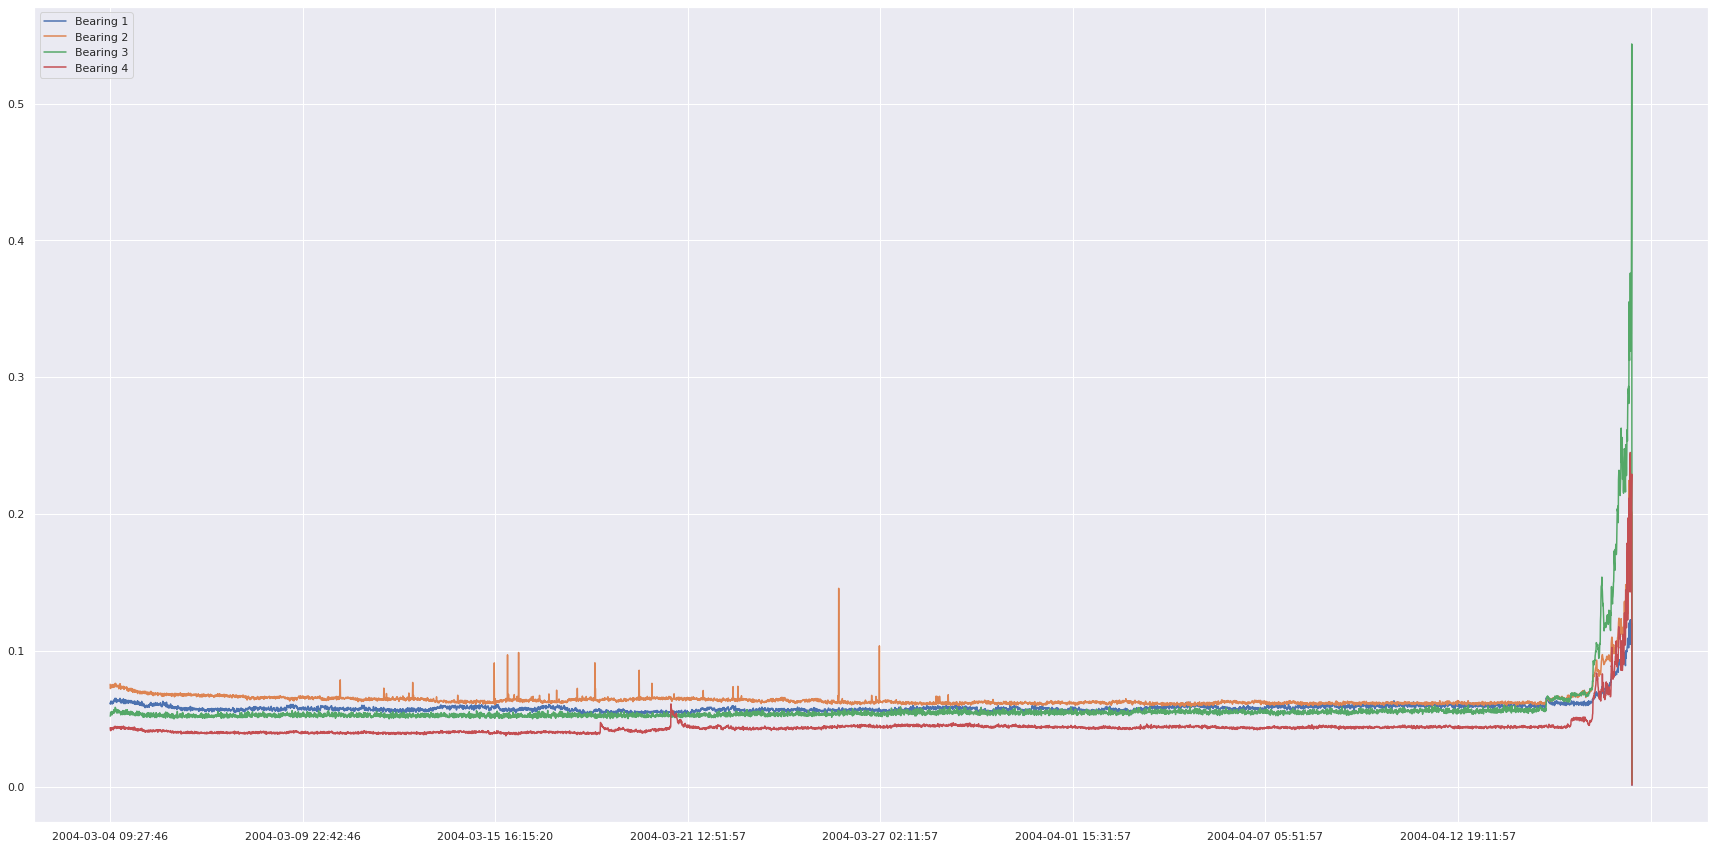

In [15]:
# bearing_data.plot(figsize = (25,10))

import matplotlib.ticker as ticker
fig, axes = plt.subplots(figsize=(30, 15))
axes.plot(bearing_data['Bearing 1'], label='Bearing 1')

axes.plot(bearing_data['Bearing 2'], label='Bearing 2')

axes.plot(bearing_data['Bearing 3'], label='Bearing 3')

axes.plot(bearing_data['Bearing 4'], label='Bearing 4')


axes.xaxis.set_major_locator(ticker.MaxNLocator(10))
axes.legend(loc='upper left')
# axes.set_ylim(0, 14)
plt.grid(True)
plt.show()

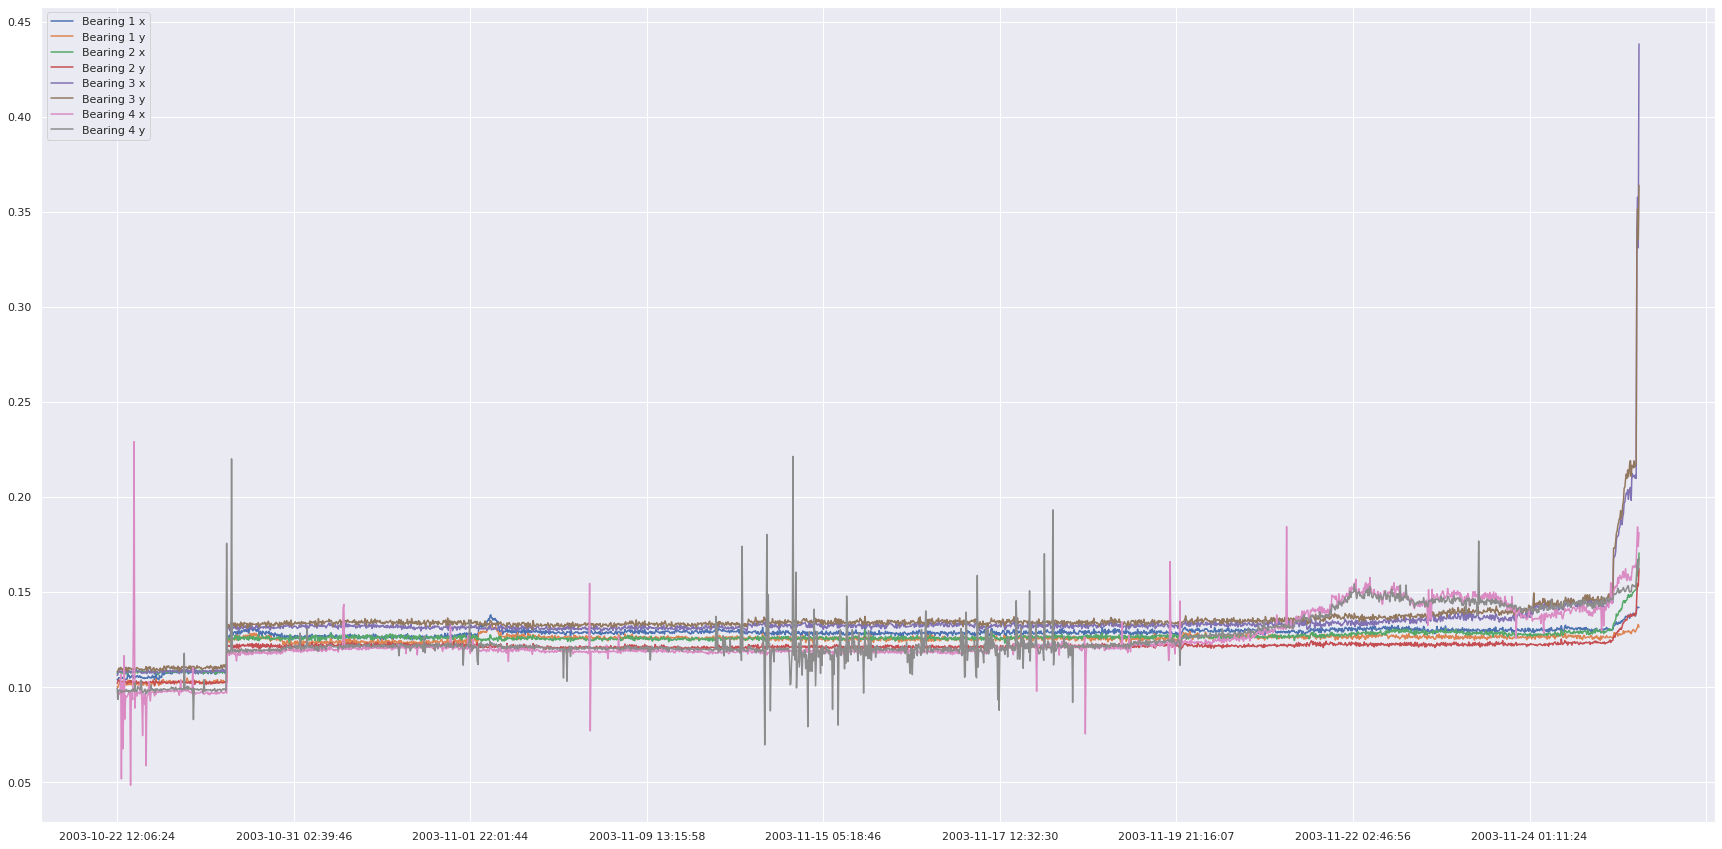

In [15]:
# bearing_data.plot(figsize = (25,10))

import matplotlib.ticker as ticker
fig, axes = plt.subplots(figsize=(30, 15))
axes.plot(bearing_data['Bearing 1 x'], label='Bearing 1 x')
axes.plot(bearing_data['Bearing 1 y'], label='Bearing 1 y')
axes.plot(bearing_data['Bearing 2 x'], label='Bearing 2 x')
axes.plot(bearing_data['Bearing 2 y'], label='Bearing 2 y')
axes.plot(bearing_data['Bearing 3 x'], label='Bearing 3 x')
axes.plot(bearing_data['Bearing 3 y'], label='Bearing 3 y')
axes.plot(bearing_data['Bearing 4 x'], label='Bearing 4 x')
axes.plot(bearing_data['Bearing 4 y'], label='Bearing 4 y')

axes.xaxis.set_major_locator(ticker.MaxNLocator(10))
axes.legend(loc='upper left')
# axes.set_ylim(0, 14)
plt.grid(True)
plt.show()

### 分割 Train/Test Data

In [14]:
# dataset_train = merged_data['2004-02-12 11:02:39':'2004-02-13 23:52:39']
# dataset_test = merged_data['2004-02-13 23:52:39':]

In [7]:
bearing_train = bearing_data['2004-02-12 11:02:39':'2004-02-15 12:52:39']
bearing_test = bearing_data['2004-02-15 12:52:39':]

In [8]:
# dataset_train.shape
dataset_test.shape

NameError: name 'dataset_test' is not defined

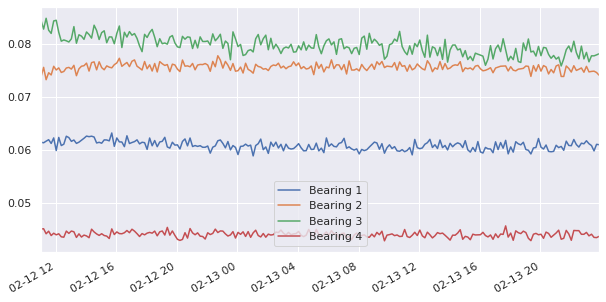

In [16]:
dataset_train.plot(figsize = (10,5))

### Normalize data:

In [9]:
scaler = preprocessing.MinMaxScaler()

In [10]:
X_train = pd.DataFrame(scaler.fit_transform(bearing_train), 
                              columns=bearing_train.columns, 
                              index=bearing_train.index)

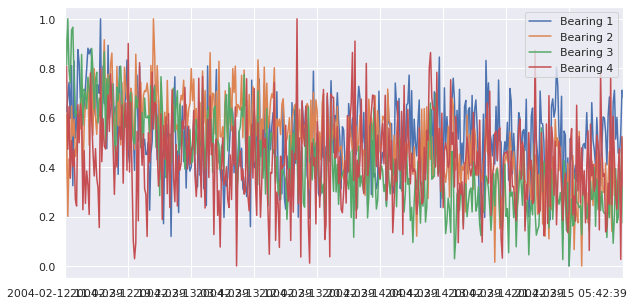

In [10]:
X_train.plot(figsize = (10,5))

In [11]:
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(bearing_test), 
                             columns=bearing_test.columns, 
                             index=bearing_test.index)

In [12]:
print(X_train.shape)
print(X_test.shape)

(444, 4)
(538, 4)


## PCA type model for anomaly detection:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

In [ ]:
# Calculate the covariance matrix:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")
        
# Calculate the Mahalanobis distance:
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

In [ ]:
# Detecting outliers:
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

In [ ]:
# Calculate threshold value for classifying datapoint as anomaly:
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

In [ ]:
# Check if matrix is positive definite:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [ ]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

In [ ]:
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

In [ ]:
mean_distr = data_train.mean(axis=0)

In [ ]:
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)

In [ ]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])

In [ ]:
plt.figure()
sns.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [ ]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

In [ ]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata.to_csv('Anomaly_distance.csv')

In [ ]:
anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])

### Defining the Autoencoder network:

In [12]:
seed(10)
set_random_seed(10)
act_func = 'elu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=500
BATCH_SIZE=16

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 44        
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [14]:
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 0)

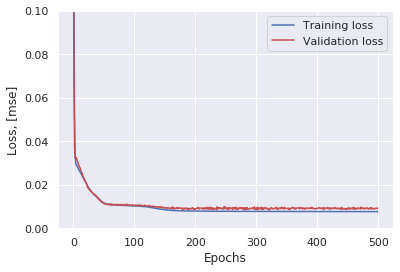

In [15]:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

(0.0, 0.5)

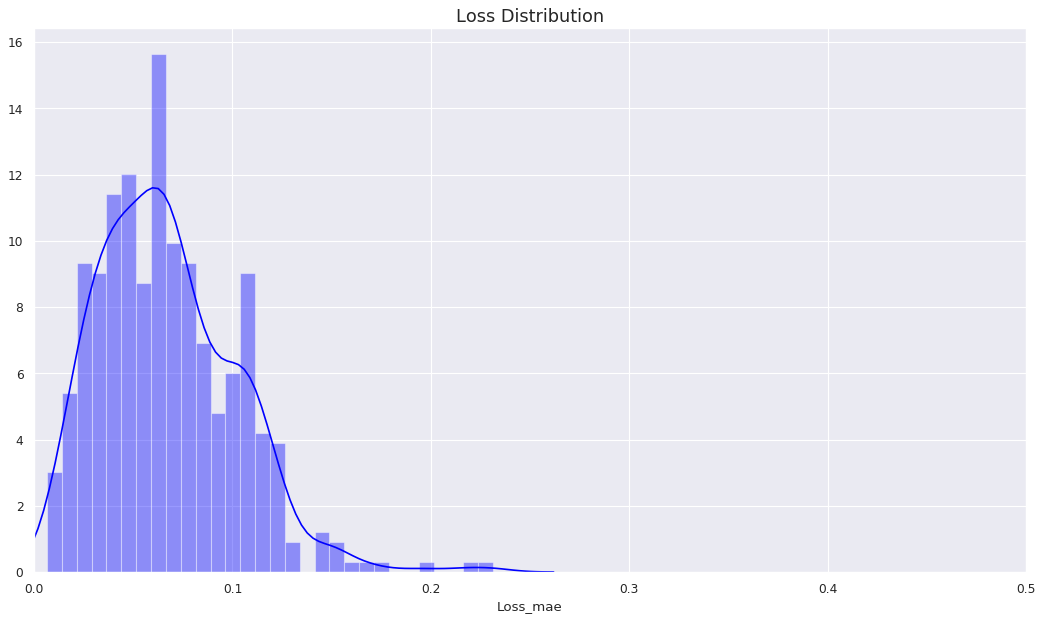

In [16]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)

plt.figure(figsize=(16, 9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'],
             bins = 30, 
             kde= True,
            color = 'blue');
plt.xlim([0.0,.5])

In [17]:
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
# scored['Threshold'] = 0.275
# scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae
2004-02-15 12:52:39,0.106762
2004-02-15 13:02:39,0.052886
2004-02-15 13:12:39,0.034006
2004-02-15 13:22:39,0.019133
2004-02-15 13:32:39,0.009764


In [18]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train, 
                      columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
# scored_train['Threshold'] = 0.275
# scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

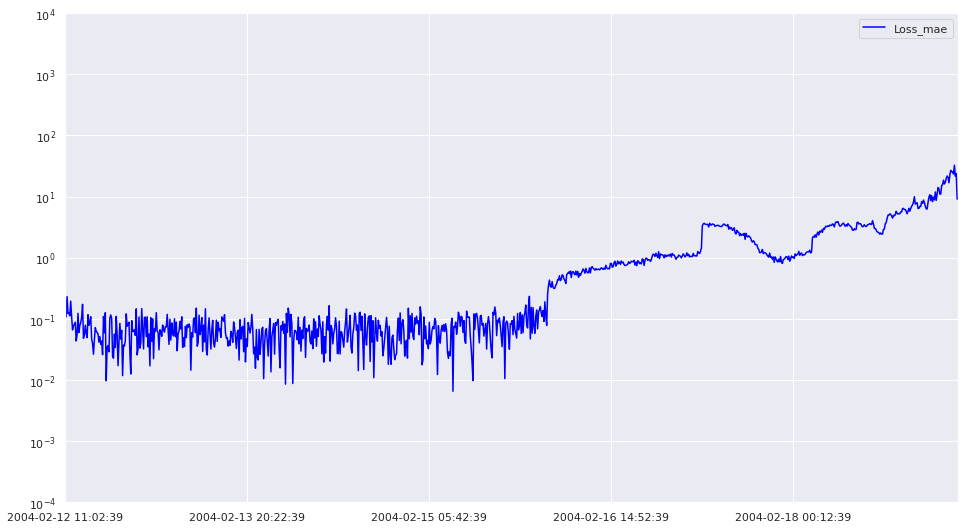

In [19]:
scored.plot(logy=True,  figsize = (16, 9), ylim = [1e-4,1e4], grid=True, color = ['blue','red'])

In [21]:
anomalies = scored[scored.Anomaly == True]
anomalies.head(15)

,Loss_mae,Threshold,Anomaly
2004-02-16 03:22:39,0.352984,0.275,True
2004-02-16 03:32:39,0.430661,0.275,True
2004-02-16 03:42:39,0.342621,0.275,True
2004-02-16 03:52:39,0.329081,0.275,True
2004-02-16 04:02:39,0.406095,0.275,True
2004-02-16 04:12:39,0.326517,0.275,True
2004-02-16 04:22:39,0.312665,0.275,True
2004-02-16 04:32:39,0.317753,0.275,True
2004-02-16 04:42:39,0.356195,0.275,True
2004-02-16 04:52:39,0.376777,0.275,True


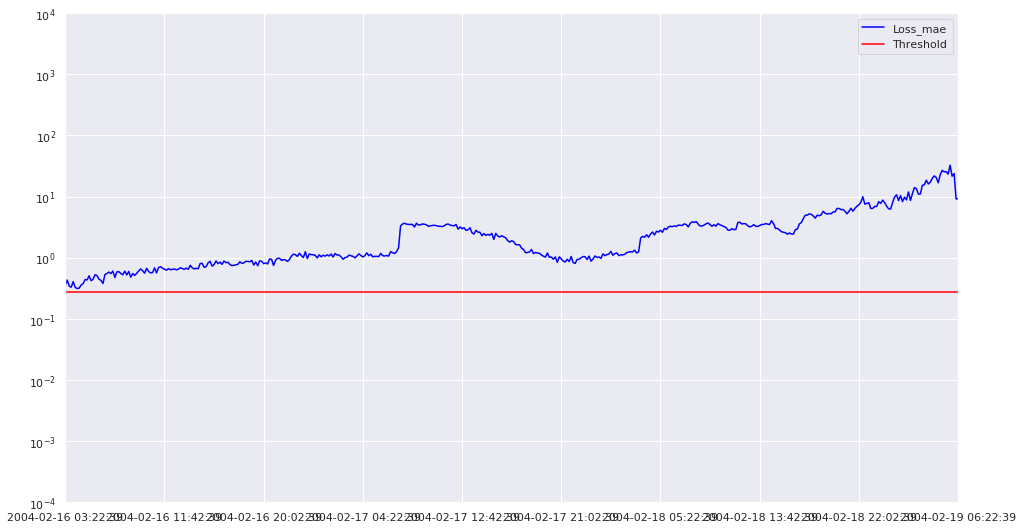

In [22]:
anomalies.plot(logy=True,  figsize = (16, 9), ylim = [1e-4,1e4], grid=True, color = ['blue','red'])

In [ ]:
from keras.utils import plot_model
# plot_model(lstm_autoencoder,show_shapes=True, to_file='model.png')
plot_model(model, to_file='model.png')

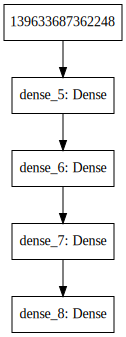

In [27]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))